In [151]:
#### Load the necessary modules###

import pandas as pd
import numpy as np
import pickle

import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', rc={'axes.grid': False})

from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn import imblearn
#from sklearn import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import cross_val_score


from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

#sheet = "CLUES Ancestry classifier"
feat = "ROC curve"



In [169]:
X = pd.read_excel('/Users/student/Documents/GSE164457 Paper/IFN_ML_input_LN_normalized.xlsx')


In [170]:
y = X.SLEDAI
X = X.drop('SLEDAI',axis=1)

In [171]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, shuffle=True,random_state = 0)

In [172]:
X_val

,Monocyte_Metammune,B_Cell_Metammune,T_Cell_Metammune,NK_Metammune,Monocyte_IFNA2_group,Monocyte_IFNG_group,B_Cell_IFNA2_group,B_Cell_IFNG_group,T_Cell_IFNA2_group,T_Cell_IFNG_group,NK_IFNA2_group,NK_IFNG_group,Age,female,Asian,antidsDNA,RNP,antiSM,antiSSA,C3
105,-0.531247,-0.716666,-0.811741,-0.633205,-0.237830,0.124381,-0.338012,-0.064573,-0.199959,-0.134640,0.029667,-0.372326,35,1,0,0.000000,0.000000,0.000000,0.000000,4.382027
10,0.464451,-0.771918,-0.776563,-0.454445,-0.242396,0.082739,-0.613857,-0.569211,-0.632982,-0.267505,-0.287386,0.448499,70,1,0,2.995732,0.000000,0.000000,0.000000,4.955827
24,-0.829861,-0.781949,-0.760609,-0.648226,-0.612984,-0.275860,-0.039257,0.148829,-0.723860,-0.354282,0.101491,-0.052735,39,1,0,2.397895,0.000000,0.000000,0.000000,3.663562
7,0.532111,0.526864,0.634593,0.379620,0.664462,-0.326706,0.431827,-0.112206,0.237018,-0.254982,0.440567,0.575464,45,0,1,0.000000,1.064711,0.000000,0.000000,5.105945
108,-0.577350,-0.750774,-0.583493,-0.563467,0.133832,0.072823,-0.577130,-0.370591,-0.170572,-0.092272,-0.421756,-0.356684,58,1,0,0.000000,0.182322,0.000000,0.000000,4.442651
56,0.809090,0.695626,0.770969,0.584721,0.008679,-0.223406,0.036261,-0.288038,0.252919,0.057042,0.000841,-0.111204,45,1,1,4.025352,2.079442,2.079442,0.000000,4.248495
63,-0.576947,-0.490530,-0.531094,-0.605779,0.461311,-0.227759,0.027809,0.210333,-0.097149,0.502213,-0.031839,-0.223820,59,1,0,0.000000,0.000000,0.000000,2.028148,4.543295
76,-0.424635,-0.661356,-0.590371,-0.542682,0.470459,0.433609,0.365910,0.552755,-0.358634,0.143179,0.131182,-0.082502,36,1,1,6.461468,0.000000,0.000000,0.000000,3.806662
26,-0.849360,-0.733218,-0.758735,-0.645368,-0.008462,-0.300241,-0.640968,0.052577,-0.489938,-0.117709,-0.564639,-0.135367,50,1,0,0.000000,0.000000,0.000000,0.000000,4.787492
2,-0.896408,-0.767945,-0.671300,-0.732399,0.049892,-0.078273,-0.339040,0.310105,-0.524276,-0.093610,-0.020295,-0.208681,64,1,0,0.000000,0.000000,0.000000,0.000000,4.700480


In [173]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
#print(X_val.shape)
#n_classes = 8

(79, 20)
(34, 20)
(79,)
(34,)


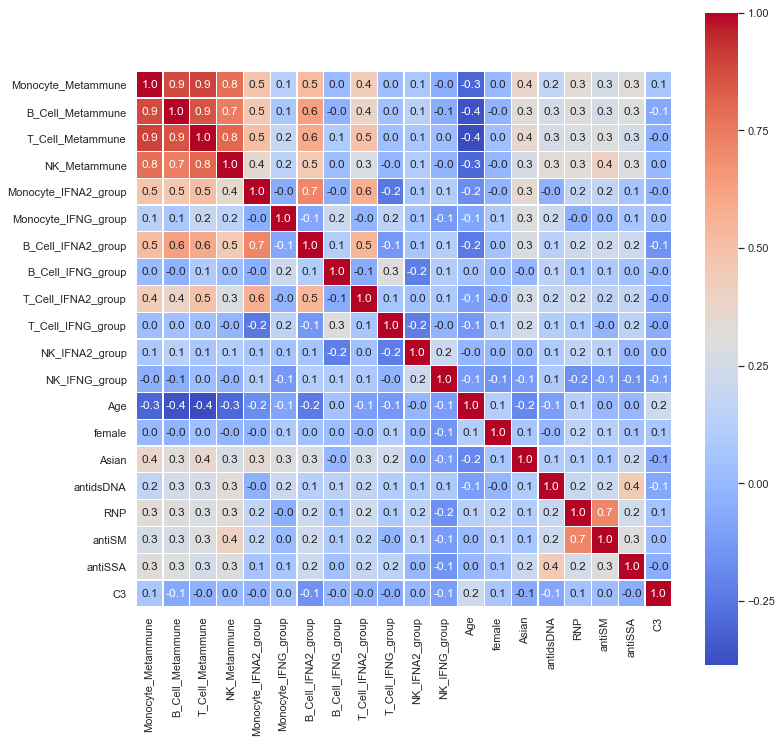

In [175]:
### Correlation between the features. The features with r > 0.8 could be considered as one fetaure. (feature selection####
corr = X_train.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.2, ax=ax);
plt.savefig("/Users/student/Documents/GSE164457 ML/GSE164457_ML_correlations_March17.png")

In [176]:
# roc curve for tpr = fpr
#import xgboost as xgb
seed = 0

random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)


# Prepare models
models = []
models.append(('ADB', AdaBoostClassifier(random_state=seed)))
models.append(('DTREE', DecisionTreeClassifier(random_state=seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(("SVM", svm.SVC(probability=True,random_state=seed)))
#models.append(('XGB', xgb.XGBClassifier(random_state=seed)))

results = []
cv_res = []
name_ML = []

roc_results_table = []
pre_recall_table = []


for name, model in models:
    model.fit(X_train, y_train)
    
    #dirP = '/Users/prat/Desktop/LuGene_results/Train_4_Test_17/VsNormalLupusGroup/model_trained_weights7/'
    #filename = f'{dirP}_{name}.sav'
    #pickle.dump(model, open(filename, 'wb'))
    
    
    pred_probs = model.predict_proba(X_val)
    preds = model.predict(X_val)
    
    #print(pred_probs)
    #print(preds)
    
    # Confusion Matrix
    TN,FP,FN,TP = confusion_matrix(y_val, preds).ravel()
    
    
    print(confusion_matrix(y_val, preds))
    
    # Cohen Kappa score
    c_score = cohen_kappa_score(y_val,preds)
    
    # Recall / Sensitivity
    SN = round(TP/(TP+FN),2)
    # Specificity
    SP = round(TN/(TN+FP),2)
    # Precision
    PRE = round(TP/(TP+FP),2)
    # Accuracy
    ACC = round((TP+TN)/(TP+TN+FP+FN),2)
    # F1 score
    f1 = 2*(PRE * SN)/(PRE + SN)
    
    df_res = pd.DataFrame({'Classifier':[name], 'Sensitivity' : [SN], "Specificity" : [SP], "Cohen_Kappa_Score":[c_score], "Precision": [PRE], "f-1 score":[f1], "Accuracy" : [ACC]})
    results.append(df_res)

    # ROC curve
    fpr, tpr, thresh = roc_curve(y_val, pred_probs[:,1], pos_label=1)
    auc_score = roc_auc_score(y_val, pred_probs[:,1])
    
    result_table = pd.DataFrame({"Classifier":[name], 'fpr':[fpr], 'tpr':[tpr],'auc':[auc_score]})
    roc_results_table.append(result_table)
    
    # Precision recall curve
    P, R, _ = precision_recall_curve(y_val, pred_probs[:,1], pos_label=1)
    auc_pre = auc(R, P)
    table_pre_recal = pd.DataFrame({"Classifier":[name], 'Precision':[P], 'Recall':[R],'auc':[auc_pre]})
    pre_recall_table.append(table_pre_recal)

    
    # K fold cross validation
    kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    cv_res.append(cv_results)
    name_ML.append(name)

[[14  5]
 [ 6  9]]
[[16  3]
 [ 5 10]]
[[13  6]
 [ 7  8]]
[[16  3]
 [ 4 11]]
[[16  3]
 [ 8  7]]
[[17  2]
 [10  5]]
[[17  2]
 [ 7  8]]
[[18  1]
 [ 9  6]]
[[18  1]
 [10  5]]


In [177]:
results


[  Classifier  Sensitivity  Specificity  Cohen_Kappa_Score  Precision  \
 0        ADB          0.6         0.74           0.339223       0.64   
 
    f-1 score  Accuracy  
 0   0.619355      0.68  ,
   Classifier  Sensitivity  Specificity  Cohen_Kappa_Score  Precision  \
 0      DTREE         0.67         0.84           0.516014       0.77   
 
    f-1 score  Accuracy  
 0   0.716528      0.76  ,
   Classifier  Sensitivity  Specificity  Cohen_Kappa_Score  Precision  \
 0         GB         0.53         0.68           0.219081       0.57   
 
    f-1 score  Accuracy  
 0   0.549273      0.62  ,
   Classifier  Sensitivity  Specificity  Cohen_Kappa_Score  Precision  \
 0        KNN         0.73         0.84           0.579505       0.79   
 
    f-1 score  Accuracy  
 0   0.758816      0.79  ,
   Classifier  Sensitivity  Specificity  Cohen_Kappa_Score  Precision  \
 0        LDA         0.47         0.84               0.32        0.7   
 
    f-1 score  Accuracy  
 0   0.562393      0.6

In [142]:
#I was exploring decision trees in greater depth, but this probably won't be best for you
d = DecisionTreeClassifier(max_depth=7)
d.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
y_train_pred = d.predict(X_train)
y_test_pred = d.predict(X_val)

In [144]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9240506329113924


array([[49,  0],
       [ 6, 24]], dtype=int64)

In [145]:
print(accuracy_score(y_val, y_test_pred))
confusion_matrix(y_val, y_test_pred)

0.8235294117647058


array([[18,  1],
       [ 5, 10]], dtype=int64)

In [146]:
from sklearn.model_selection import cross_validate

In [147]:
results = cross_validate(estimator=d,X=X_val,y=y_val,cv=10,scoring=['accuracy','precision','recall','f1'],return_train_score=True)

In [148]:
results

{'fit_time': array([0.00299215, 0.00201178, 0.00099778, 0.00199485, 0.00099707,
        0.00199342, 0.00099754, 0.00199485, 0.00201845, 0.00199342]),
 'score_time': array([0.00598431, 0.00400138, 0.00402045, 0.00299168, 0.0039897 ,
        0.00299311, 0.00498939, 0.00299168, 0.00399542, 0.00299311]),
 'test_accuracy': array([0.5       , 0.5       , 0.75      , 0.75      , 0.25      ,
        0.66666667, 1.        , 0.66666667, 0.33333333, 0.5       ]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.        , 0.        , 1.        , 0.66666667, 0.33333333,
        0.5       , 1.        , 0.        , 0.        , 0.5       ]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0. , 0. , 0.5, 1. , 0.5, 1. , 1. , 0. , 0. , 1. ]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.        , 0.        , 0.66666667, 0.8       , 0.4       ,
        0.66666667, 1.        

In [149]:
acc=results['test_accuracy']
print(np.mean(acc))

0.5916666666666666


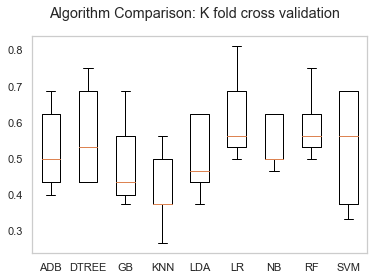

In [178]:
# boxplot algorithm comparison: Average acuuracy with 10 fold cross validation
fig = plt.figure()
fig.suptitle('Algorithm Comparison: K fold cross validation')
ax = fig.add_subplot(1,1,1)
plt.boxplot(cv_res)
ax.set_xticklabels(name_ML)
plt.show()

In [179]:
result_table = pd.concat(roc_results_table,ignore_index=True)
result_table.set_index('Classifier', inplace=True)

In [180]:
result_table

,fpr,tpr,auc
Classifier,,,
ADB,"[0.0, 0.0, 0.0, 0.05263157894736842, 0.0526315...","[0.0, 0.06666666666666667, 0.4666666666666667,...",0.789474
DTREE,"[0.0, 0.15789473684210525, 1.0]","[0.0, 0.6666666666666666, 1.0]",0.754386
GB,"[0.0, 0.0, 0.0, 0.10526315789473684, 0.1052631...","[0.0, 0.06666666666666667, 0.3333333333333333,...",0.740351
KNN,"[0.0, 0.0, 0.15789473684210525, 0.578947368421...","[0.0, 0.06666666666666667, 0.7333333333333333,...",0.849123
LDA,"[0.0, 0.0, 0.05263157894736842, 0.052631578947...","[0.0, 0.06666666666666667, 0.06666666666666667...",0.673684
LR,"[0.0, 0.0, 0.0, 0.05263157894736842, 0.0526315...","[0.0, 0.06666666666666667, 0.2, 0.2, 0.2666666...",0.719298
NB,"[0.0, 0.0, 0.0, 0.10526315789473684, 0.1052631...","[0.0, 0.06666666666666667, 0.2, 0.2, 0.5333333...",0.708772
RF,"[0.0, 0.0, 0.0, 0.05263157894736842, 0.1578947...","[0.0, 0.13333333333333333, 0.3333333333333333,...",0.810526
SVM,"[0.0, 0.05263157894736842, 0.10526315789473684...","[0.0, 0.0, 0.0, 0.13333333333333333, 0.1333333...",0.235088


In [181]:
pre_table = pd.concat(pre_recall_table,ignore_index=True)
pre_table.set_index('Classifier', inplace=True)

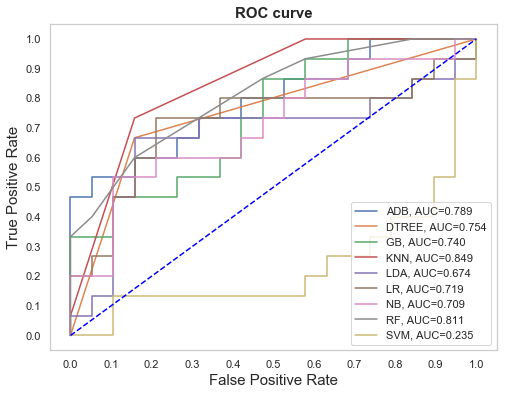

<Figure size 432x288 with 0 Axes>

In [182]:
# Plot ROC curve

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='blue', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title(feat, fontweight='bold', fontsize=15)
plt.legend(prop={'size':11}, loc='lower right')

plt.show()

plt.savefig("/Users/student/Documents/GSE164457 ML/Round2_ROC.svg")

In [267]:
res = pd.concat(results,ignore_index=True)

In [514]:
import dataframe_image as dfi
results_styled = res.style.background_gradient()
dfi.export(res, '/Users/prat/Desktop/LuGene_results/Train_4_Test_17/VsNormalLupusGroup/C0_C7_Performance_metrics_VSet.png')

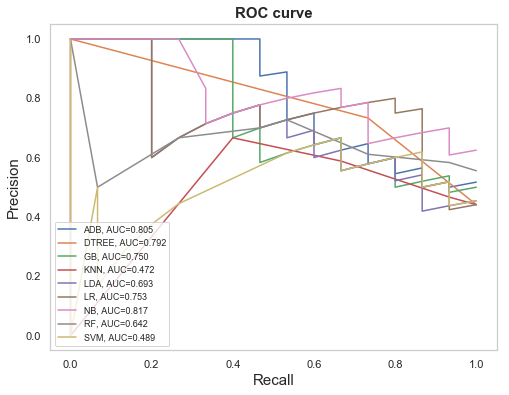

In [268]:
# Plot Precision recall curve

fig = plt.figure(figsize=(8,6))

for i in pre_table.index:
    plt.plot(pre_table.loc[i]['Recall'], 
             pre_table.loc[i]['Precision'],
             label="{}, AUC={:.3f}".format(i, pre_table.loc[i]['auc']))


#plt.plot([0,0], color='blue', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.2))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.2))
plt.ylabel("Precision", fontsize=15)

plt.title(feat, fontweight='bold', fontsize=15)
plt.legend(prop={'size':9}, loc='lower left')

#plt.show()



In [269]:
first_model_names = ['AdaBoost','Decision Tree','GradientBoosting','K-Neighbors',
                     'Linear Discriminant Analysis','Logistic Regression', 'NB', 'Random Forest', 'SVM']
                    

In [270]:
feature_names = X_train.columns[0:20]
feat_imp_df = pd.DataFrame(columns=first_model_names, index=feature_names)

# Dropping the Models that don't have feature importances for this analysis
feat_imp_df.drop(['SVM', 'K-Neighbors', 'NB'], axis=1, inplace=True)

# I'm using absolute values for logistic Regression and LDA because we only care about the magnitude of the coefficient, not its direction 
feat_imp_df['Logistic Regression'] = np.abs(LogisticRegression(random_state=seed).fit(X_train,y_train).coef_.ravel())
feat_imp_df['Linear Discriminant Analysis'] = np.abs(LinearDiscriminantAnalysis().fit(X_train,y_train).coef_.ravel())
feat_imp_df['Decision Tree'] = DecisionTreeClassifier(random_state=seed).fit(X_train,y_train).feature_importances_
feat_imp_df['Random Forest'] = RandomForestClassifier(random_state=seed).fit(X_train,y_train).feature_importances_
feat_imp_df['GradientBoosting'] = GradientBoostingClassifier(random_state=seed).fit(X_train,y_train).feature_importances_
feat_imp_df['AdaBoost'] = AdaBoostClassifier(random_state=seed).fit(X_train,y_train).feature_importances_

In [271]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)
scaled_fi['Overall'] = scaled_fi.sum(axis=1)

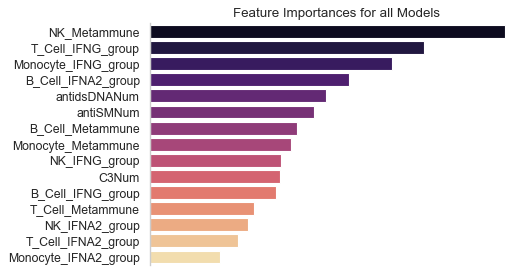

In [272]:
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(6,4), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');